In [46]:
%matplotlib inline
import numpy as np
import mrcfile
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

from multiprocessing import Pool
from itertools import product, islice

In [103]:
mrc = mrcfile.open('FoilHole_244341_Data_236563_236564_20180302_1213_frames.mrc', permissive=True)
data = np.copy(mrc.data)
data -= np.mean(data)

BOX_SIZE = 100

def get_entropy((x, y)):
    frame = data[y:y+BOX_SIZE, x:x+BOX_SIZE]
    (h, coords) = np.histogram(frame.ravel(), bins=50, density=True)
    h[h==0] = 1
    return -np.sum(h*np.log(h))
        
p = Pool(22)
(height, width) = data.shape
coords = product(xrange(0,  height-BOX_SIZE), xrange(0,  width-BOX_SIZE))
entropy = p.map(get_entropy, coords)

In [6]:
entropy = np.array(entropy).reshape(width-BOX_SIZE, height-BOX_SIZE).T

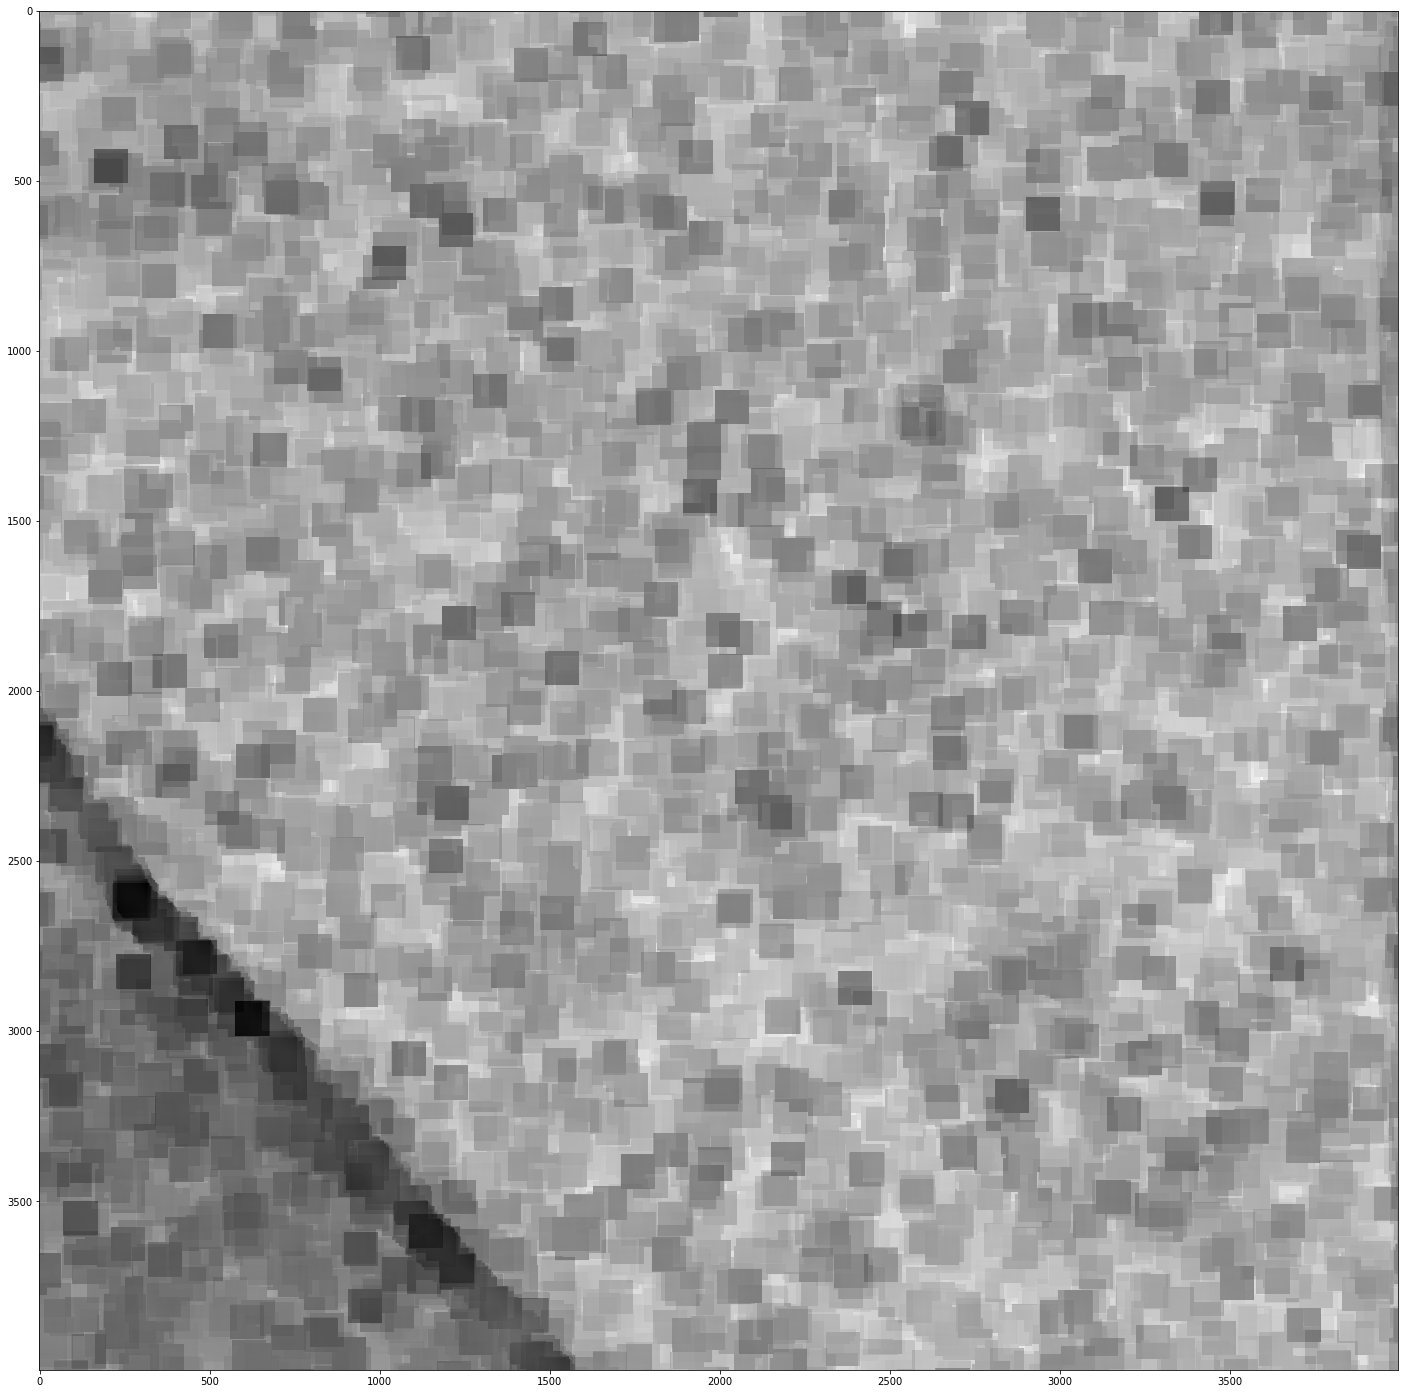

In [74]:
entropy2 = entropy.copy()
plt.figure(figsize=(25,25))
plt.imshow(entropy2, cmap='gray')


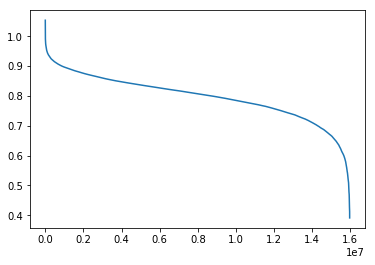

In [86]:
# xx = np.arange(0, width-BOX_SIZE) + BOX_SIZE // 2
# yy = np.arange(0, height-BOX_SIZE) + BOX_SIZE // 2

entropy_ranked = np.sort(entropy.ravel())[::-1]
plt.plot(entropy_ranked)

# print xx[:10]
# print entropy.ravel()[:10]

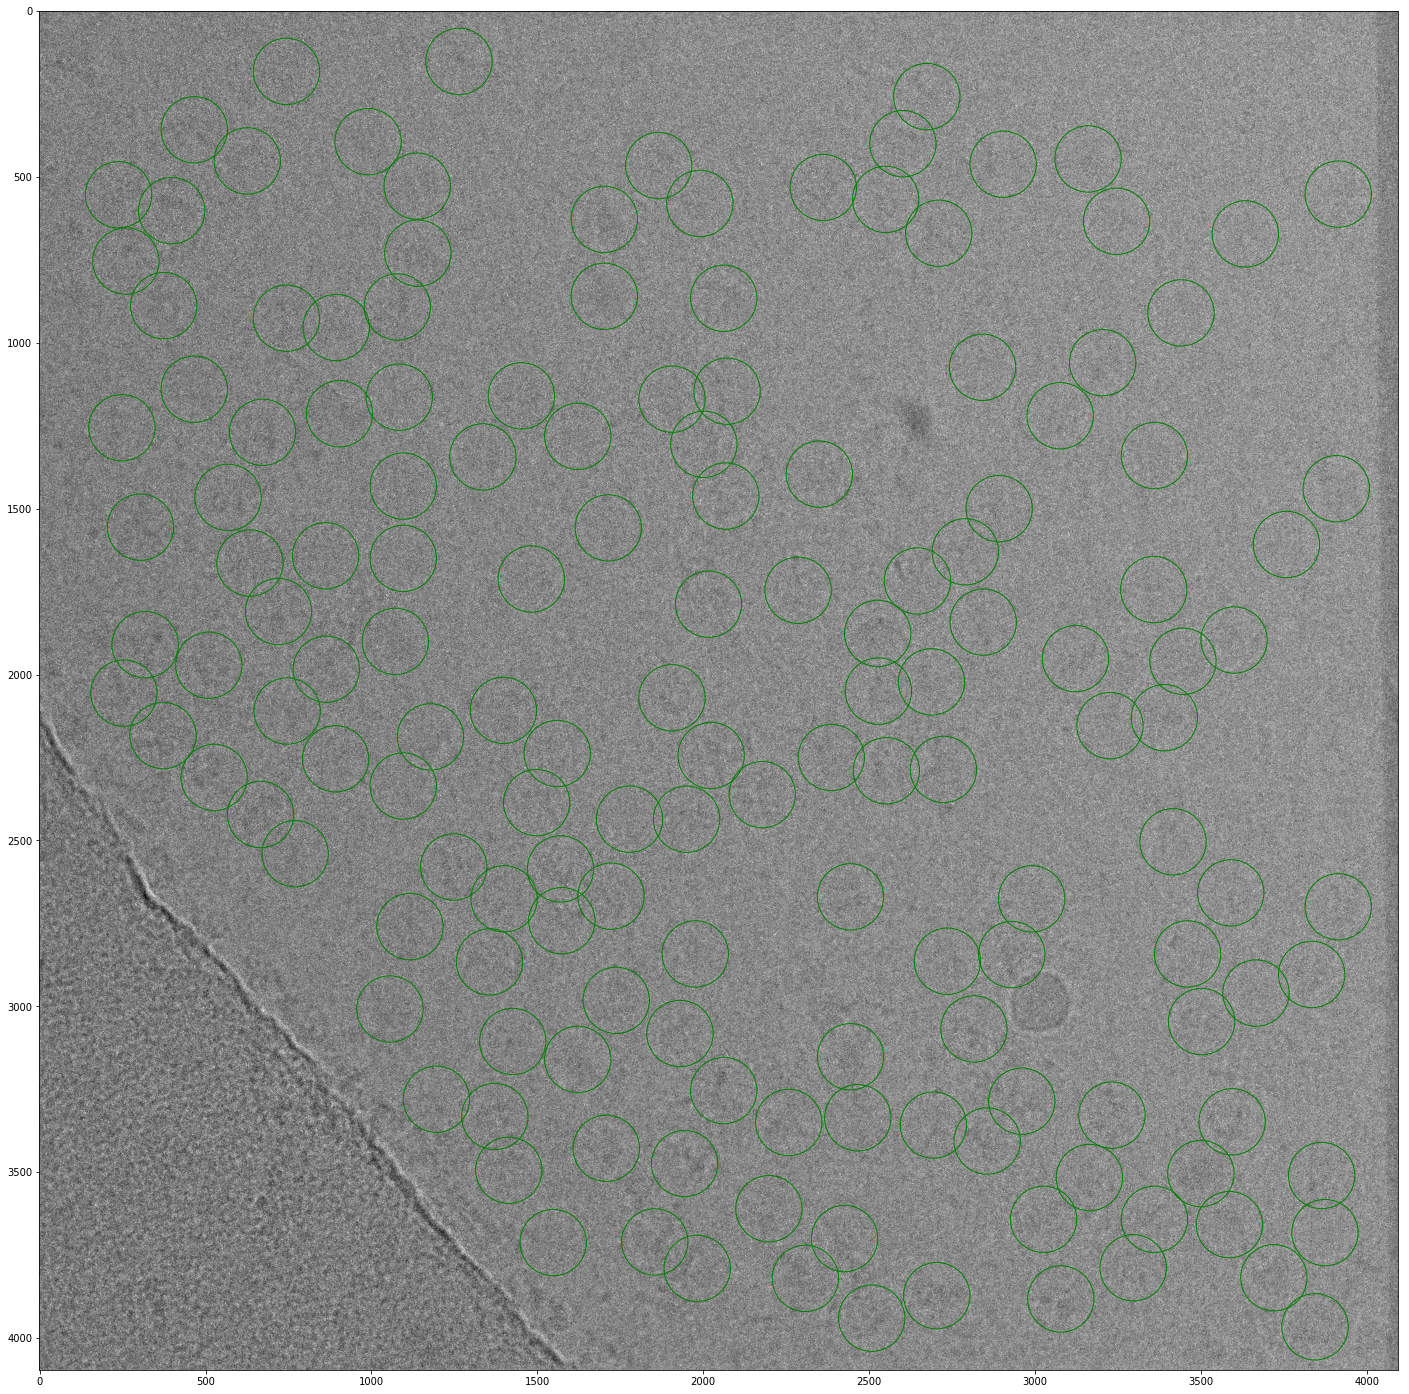

In [92]:
fig, ax = plt.subplots(figsize=(25, 25))

patches_list = []

particles_entropy = []

plt.imshow(data, cmap='gray')
for l in open('FoilHole_244341_Data_236563_236564_20180302_1213_frames_automatch.star', 'r'):
    l = l.strip().split()
    if len(l) < 5:
        continue
    c = Circle((float(l[0]), float(l[1])), 100)
    particles_entropy.append(get_entropy((int(l[0]), int(l[1]))))
    patches_list.append(c)
    
p = PatchCollection(patches_list, color='g', facecolor='none')
ax.add_collection(p)                        

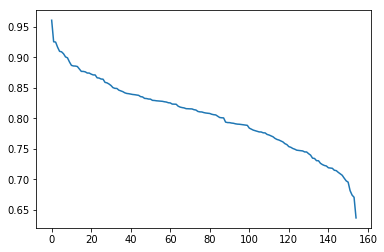

In [102]:
particles_entropy = np.array(particles_entropy)[::-1]
plt.plot(particles_entropy)